<a href="https://colab.research.google.com/github/bardiaHSZD/Algorithms_DataStructure/blob/main/Leetcode_Problems_Set_V_Stack_and_Queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Stack and Queue**

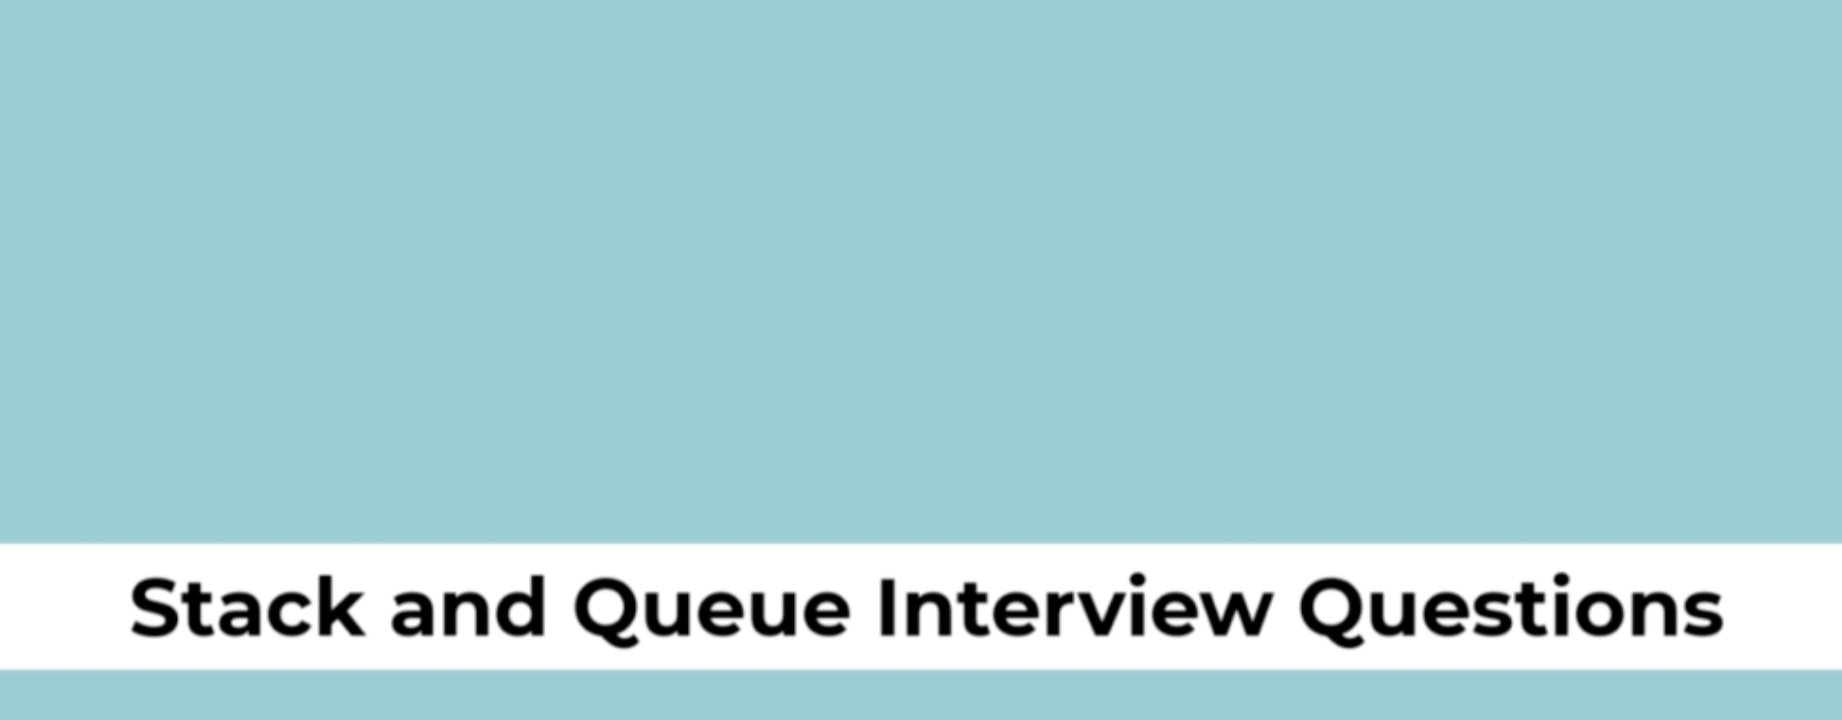

###**Sample Problem: Three Stacks in one List**

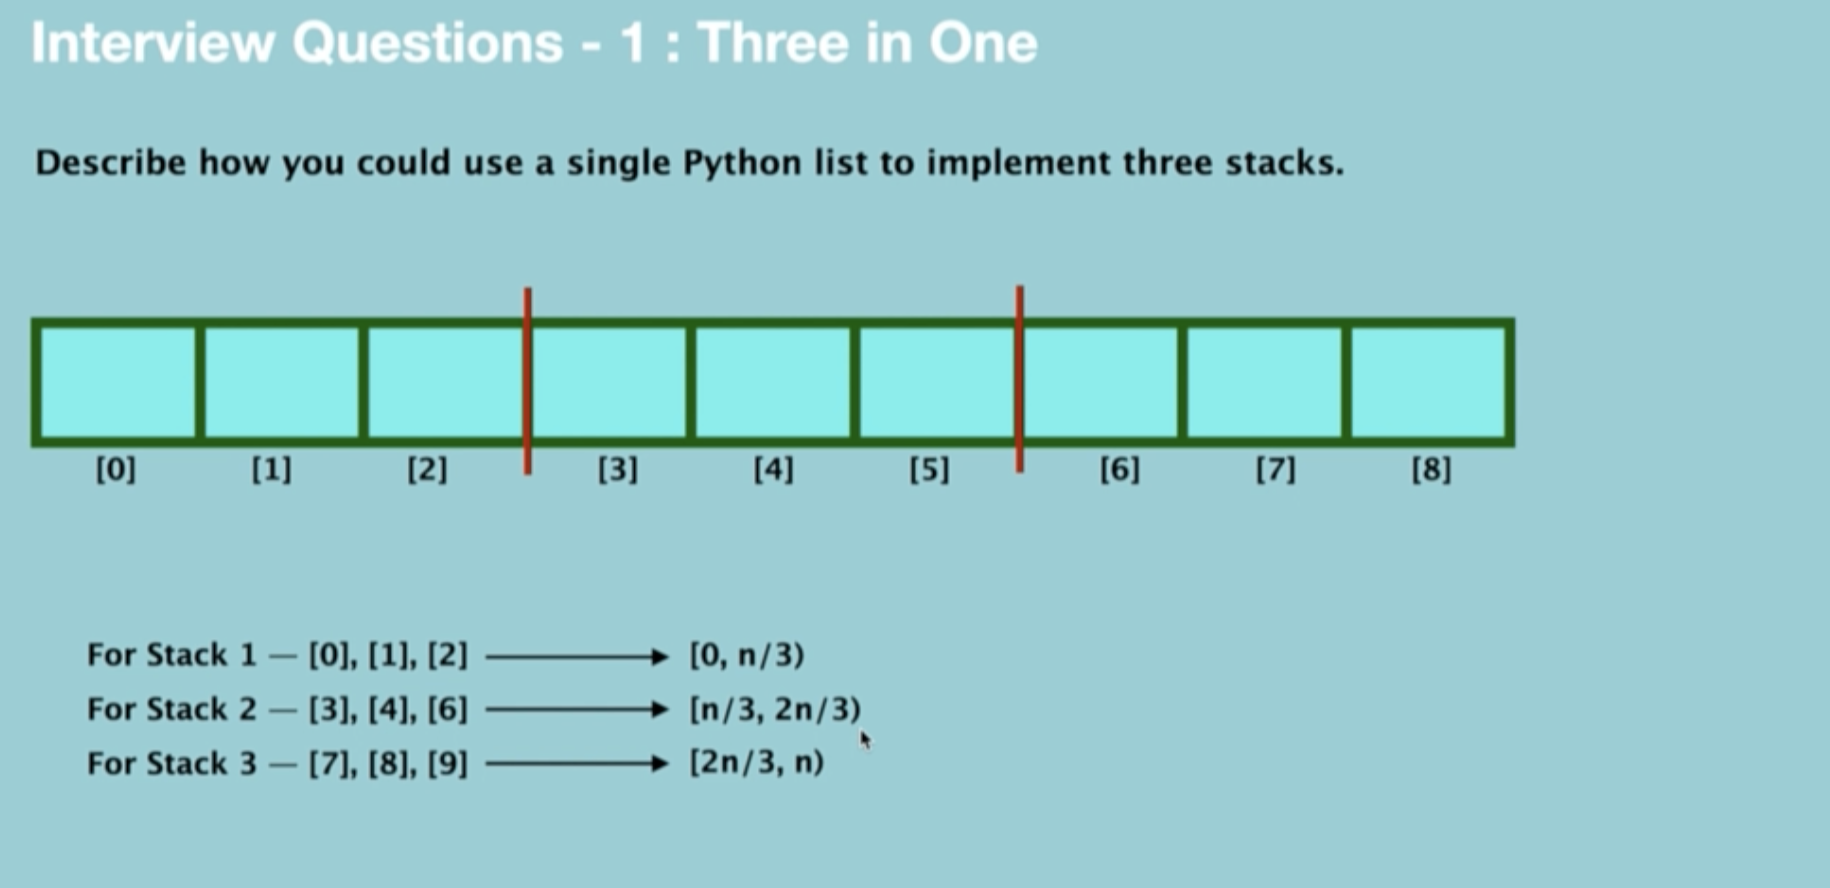

In [ ]:
class MultiStack:
  def __init__(self,stackSize):
    self.numberOfStacks = 3
    self.customList = [0] * (stackSize * self.numberOfStacks)
    self.sizes = [0] * self.numberOfStacks
    self.stackSize = stackSize

  def isFull(self, stackNumber):
    if self.sizes[stackNumber] == self.stackSize:
      return True
    else:
      return False

  def isEmpty(self, stackNumber):
    if self.sizes[stackNumber] == 0:
      return True
    else:
      return False

  def indexOfTop(self, stackNumber):
    offset = stackNumber * self.stackSize
    return offset + self.sizes[stack] - 1                

  def push(self, stackNumber, item):
    if self.isFull(stackNumber):
      return "The stack is full."
    else:
      self.size[stackNumber] += 1
      self.customList[self.indexOfTop(stackNumber)] = item

  def pop(self, stackNumber):
    if self.isEmpty(stackNumber):
      return "The stack is empty"
    else:
      value = self.customList[self.indexOfTop(stackNumber)]
      self.customList[self.indexOfTop(stackNumber)] = 0
      self.stackSizes[stackNumber] -= 1
      return value

  def peek(self, stackNumber):
    if self.isEmpty(stackNumber):
      return "The stack is empty"
    else:
      value = self.customList[self.indexOfTop(stackNumber)]
      print(self.customList)
      return value


customStack = MultiStack(6)
print(customStack.isFull(0))
print(customStack.isEmpty(1))
customStack.push(0, 1)
customStack.push(0, 2)
customStack.push(2, 3)
print(customStack.pop(0))      

###**155. Min Stack**

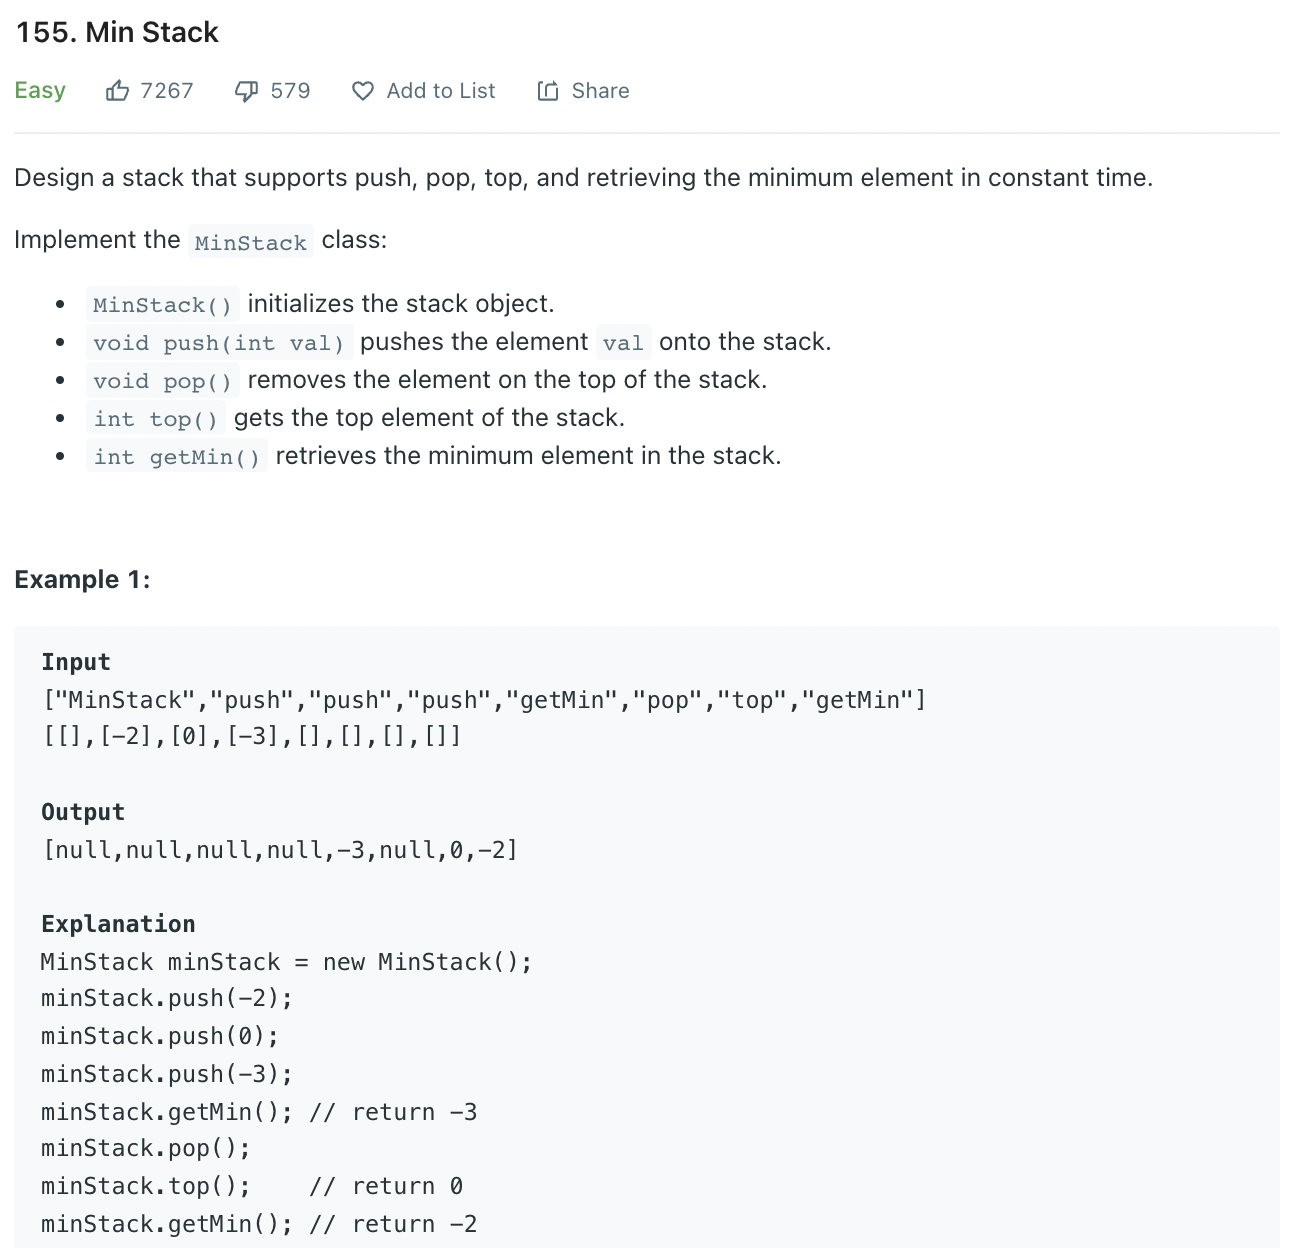

In [ ]:
class Node(object):
    def __init__(self, value=None, next=None):
        self.value = value
        self.next = next
        
class MinStack(object):

    def __init__(self):
        self.minNode = None
        self.topNode = None

    def push(self, val):
        """
        :type val: int
        :rtype: None
        """
        self.topNode = Node(value = val, next=self.topNode)

            
        if self.minNode and (self.minNode.value < val):
            self.minNode = Node(value = self.minNode.value, next=self.minNode)
        else:
            self.minNode = Node(value = val, next=self.minNode)

            

    def pop(self):
        """
        :rtype: None
        """

        if not self.topNode:
            return None
        self.minNode = self.minNode.next
        item = self.topNode.value
        self.topNode = self.topNode.next
        return item

    def top(self):
        """
        :rtype: int
        """
        if not self.topNode:
            return None
        else:
            return int(self.topNode.value)   
        

    def getMin(self):
        """
        :rtype: int
        """
        if not self.minNode:
            return None
        else:
            return int(self.minNode.value)       
        
        

# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

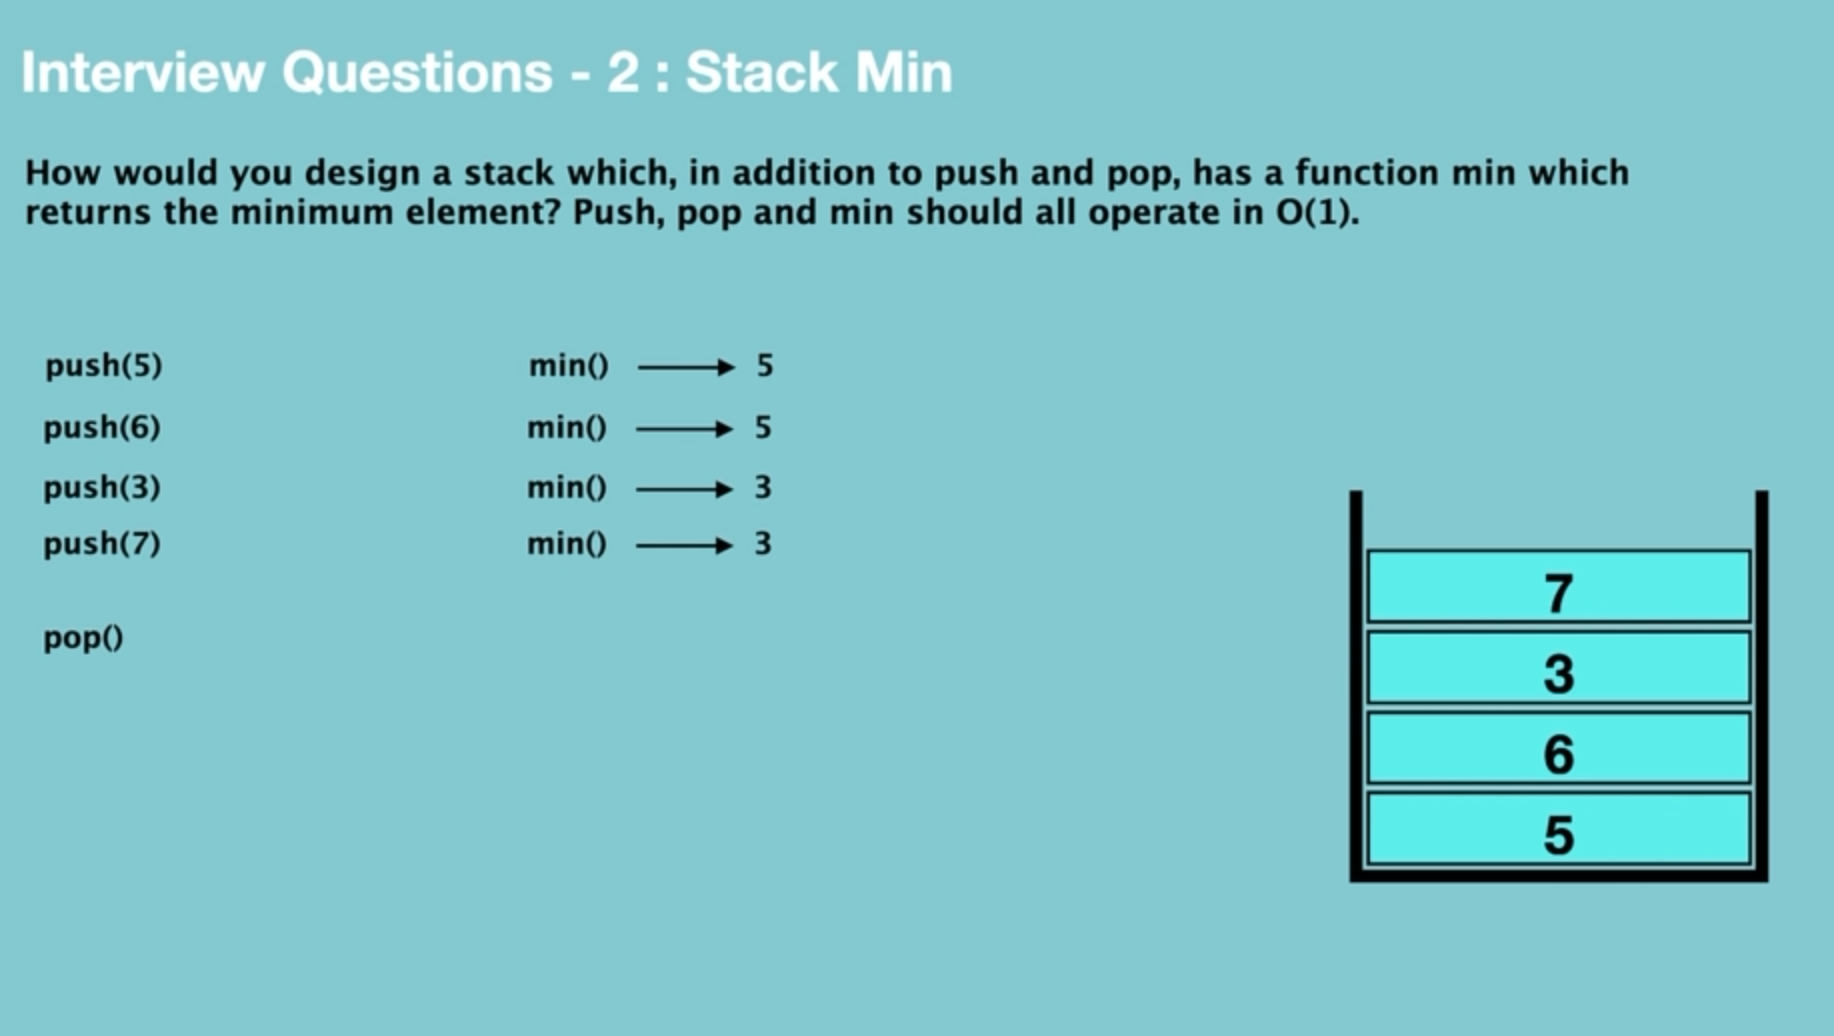

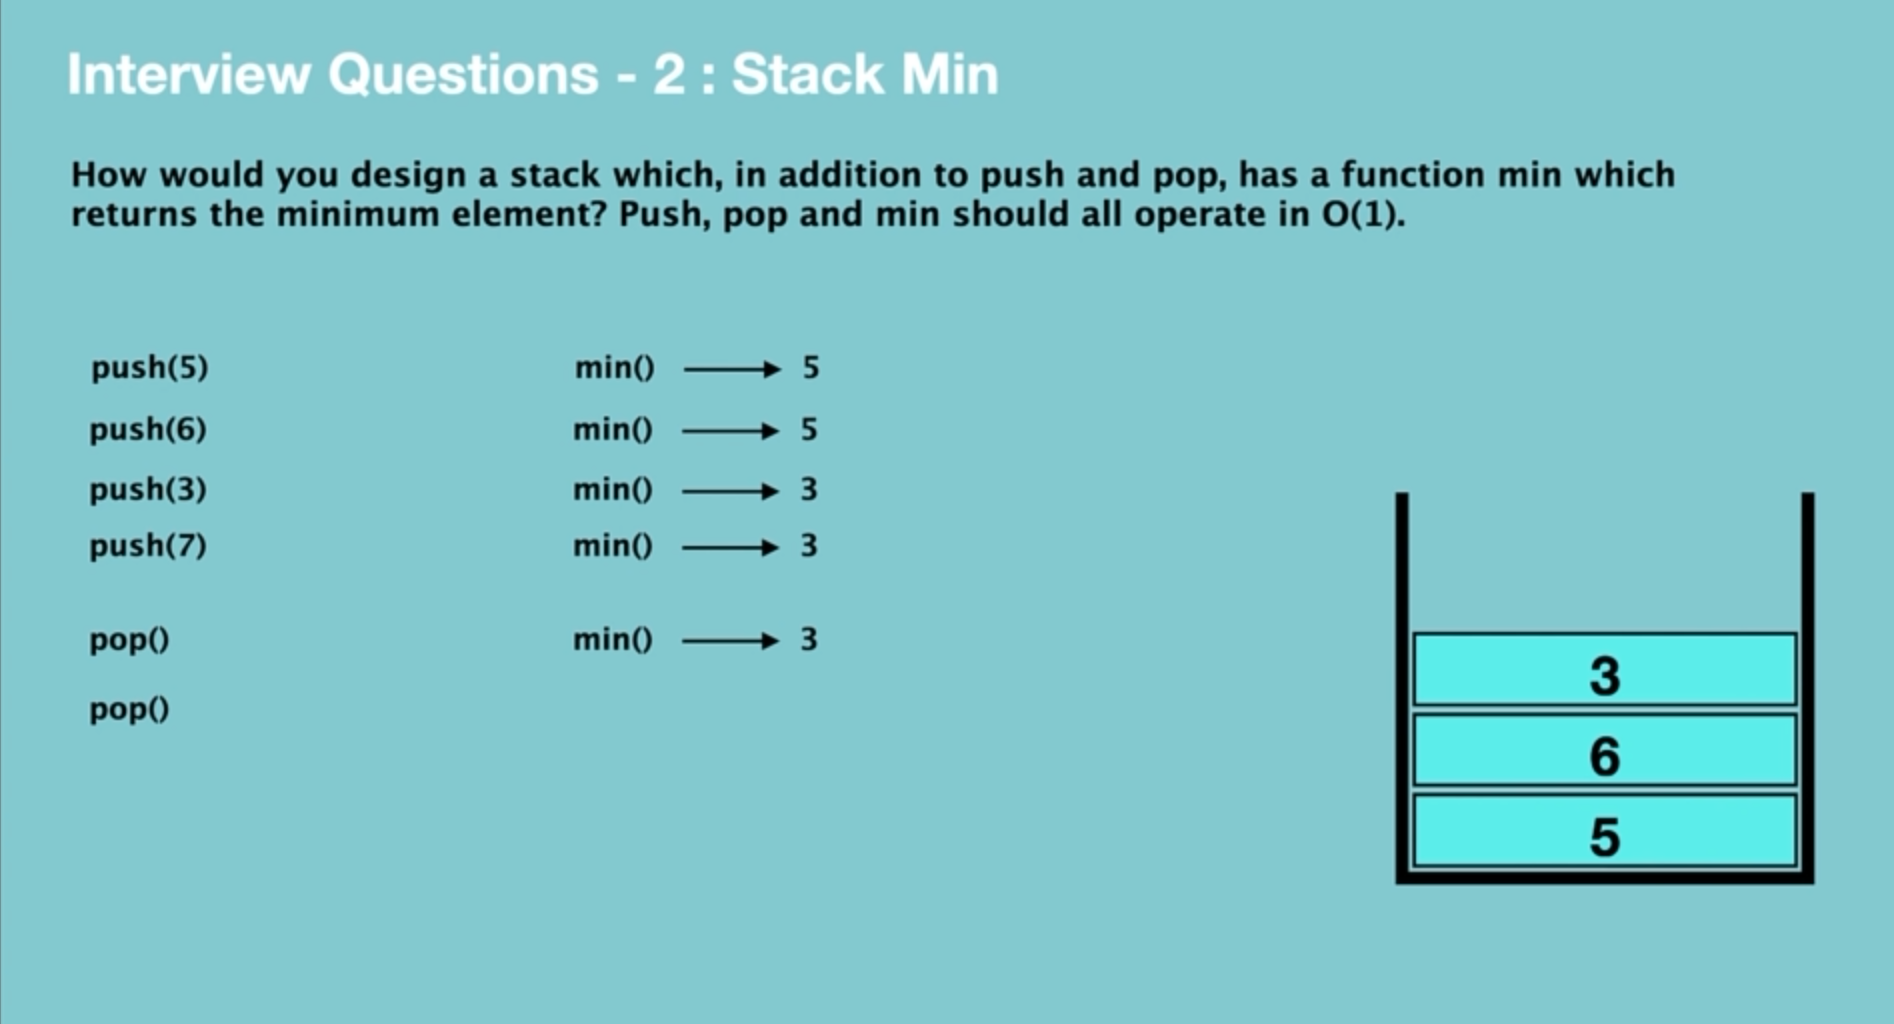

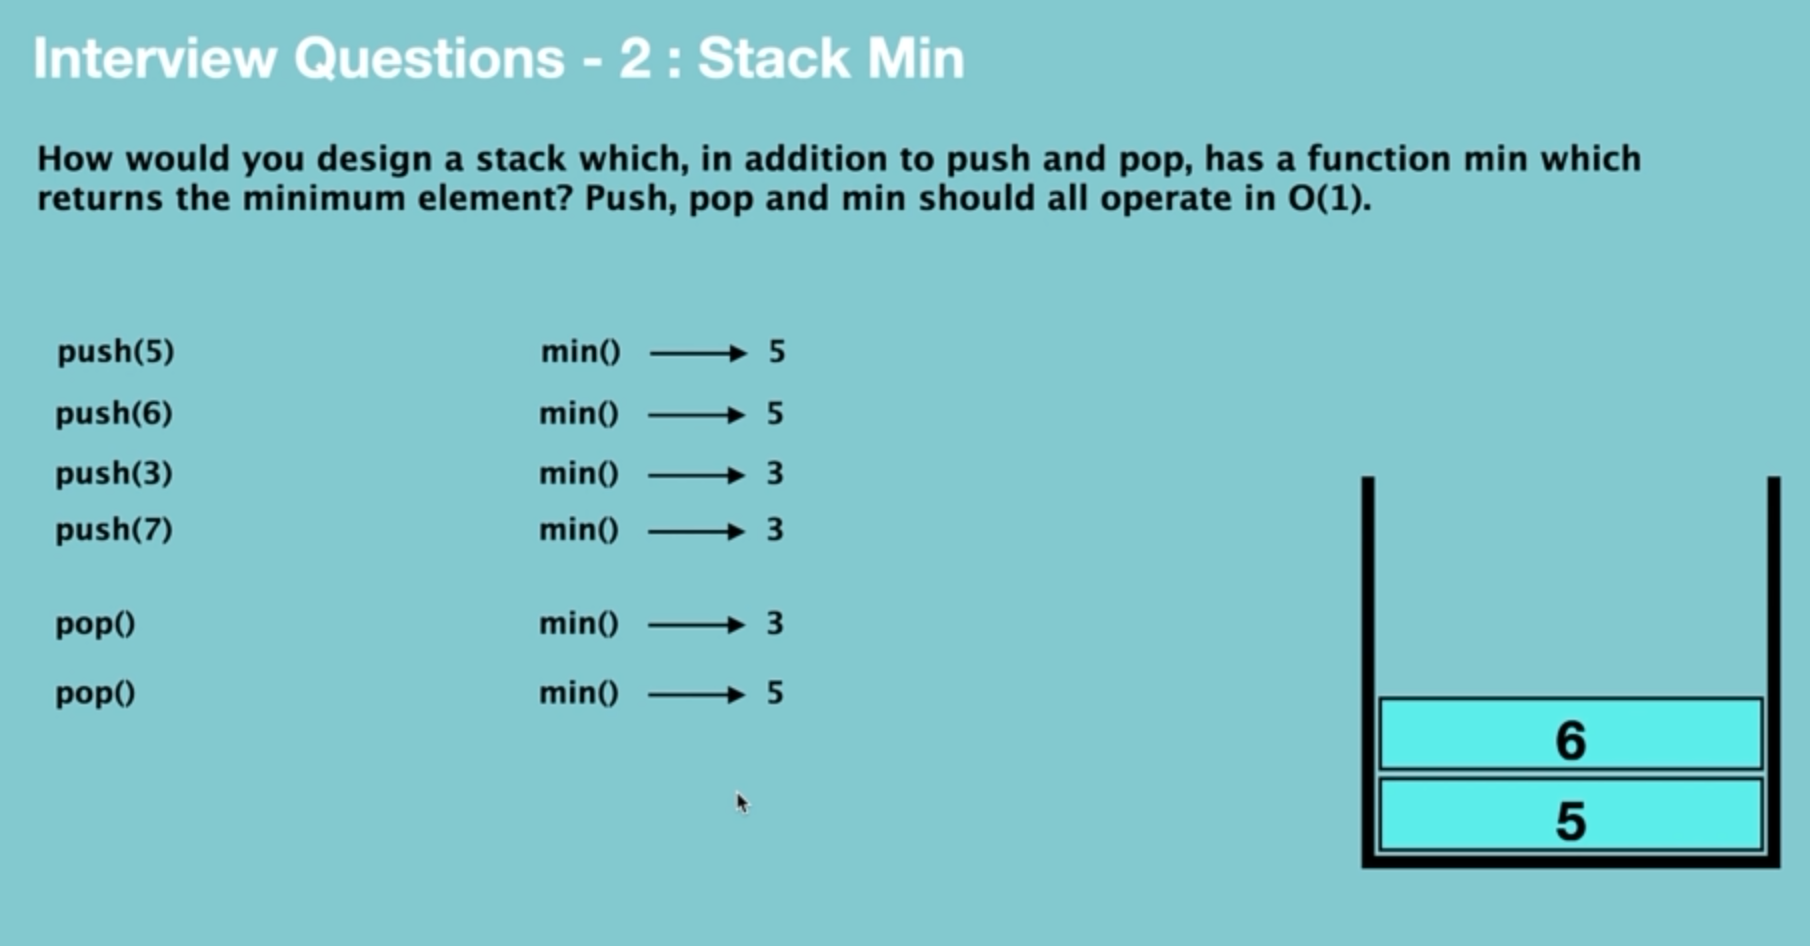

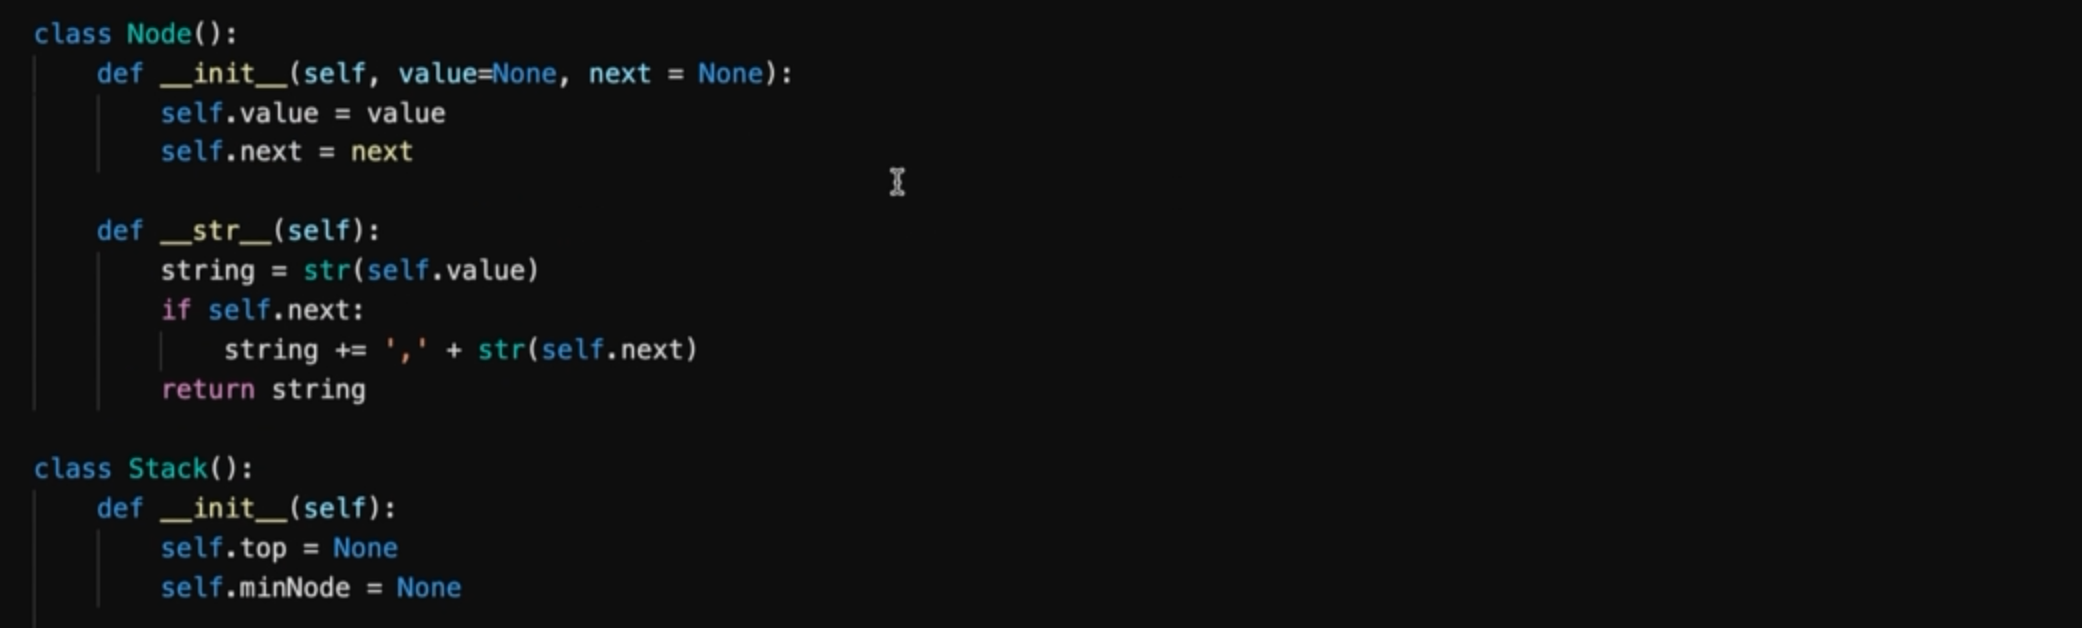

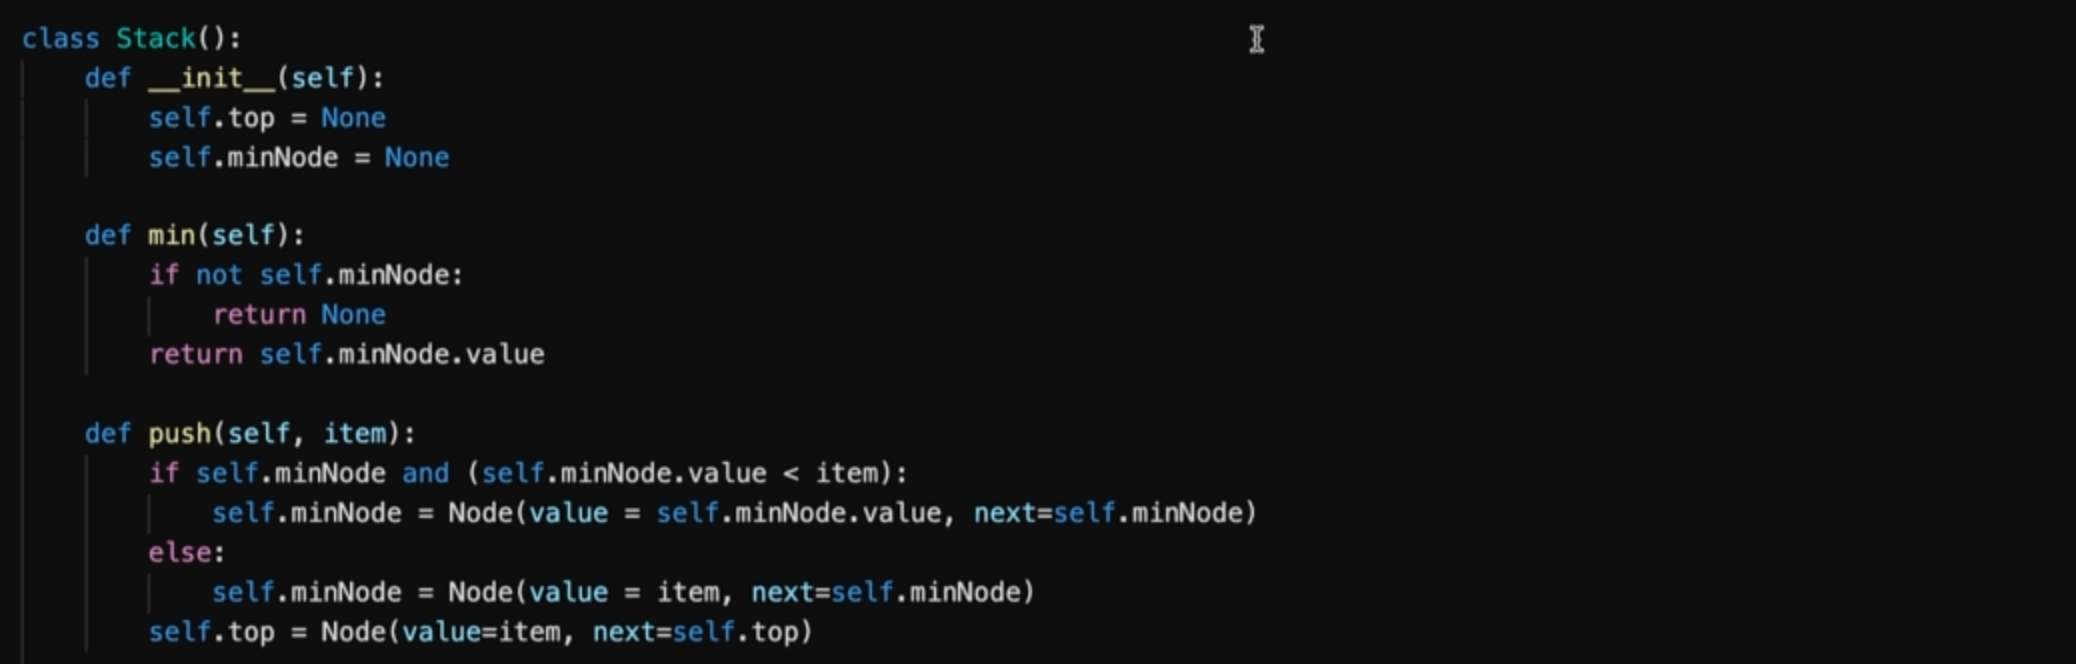

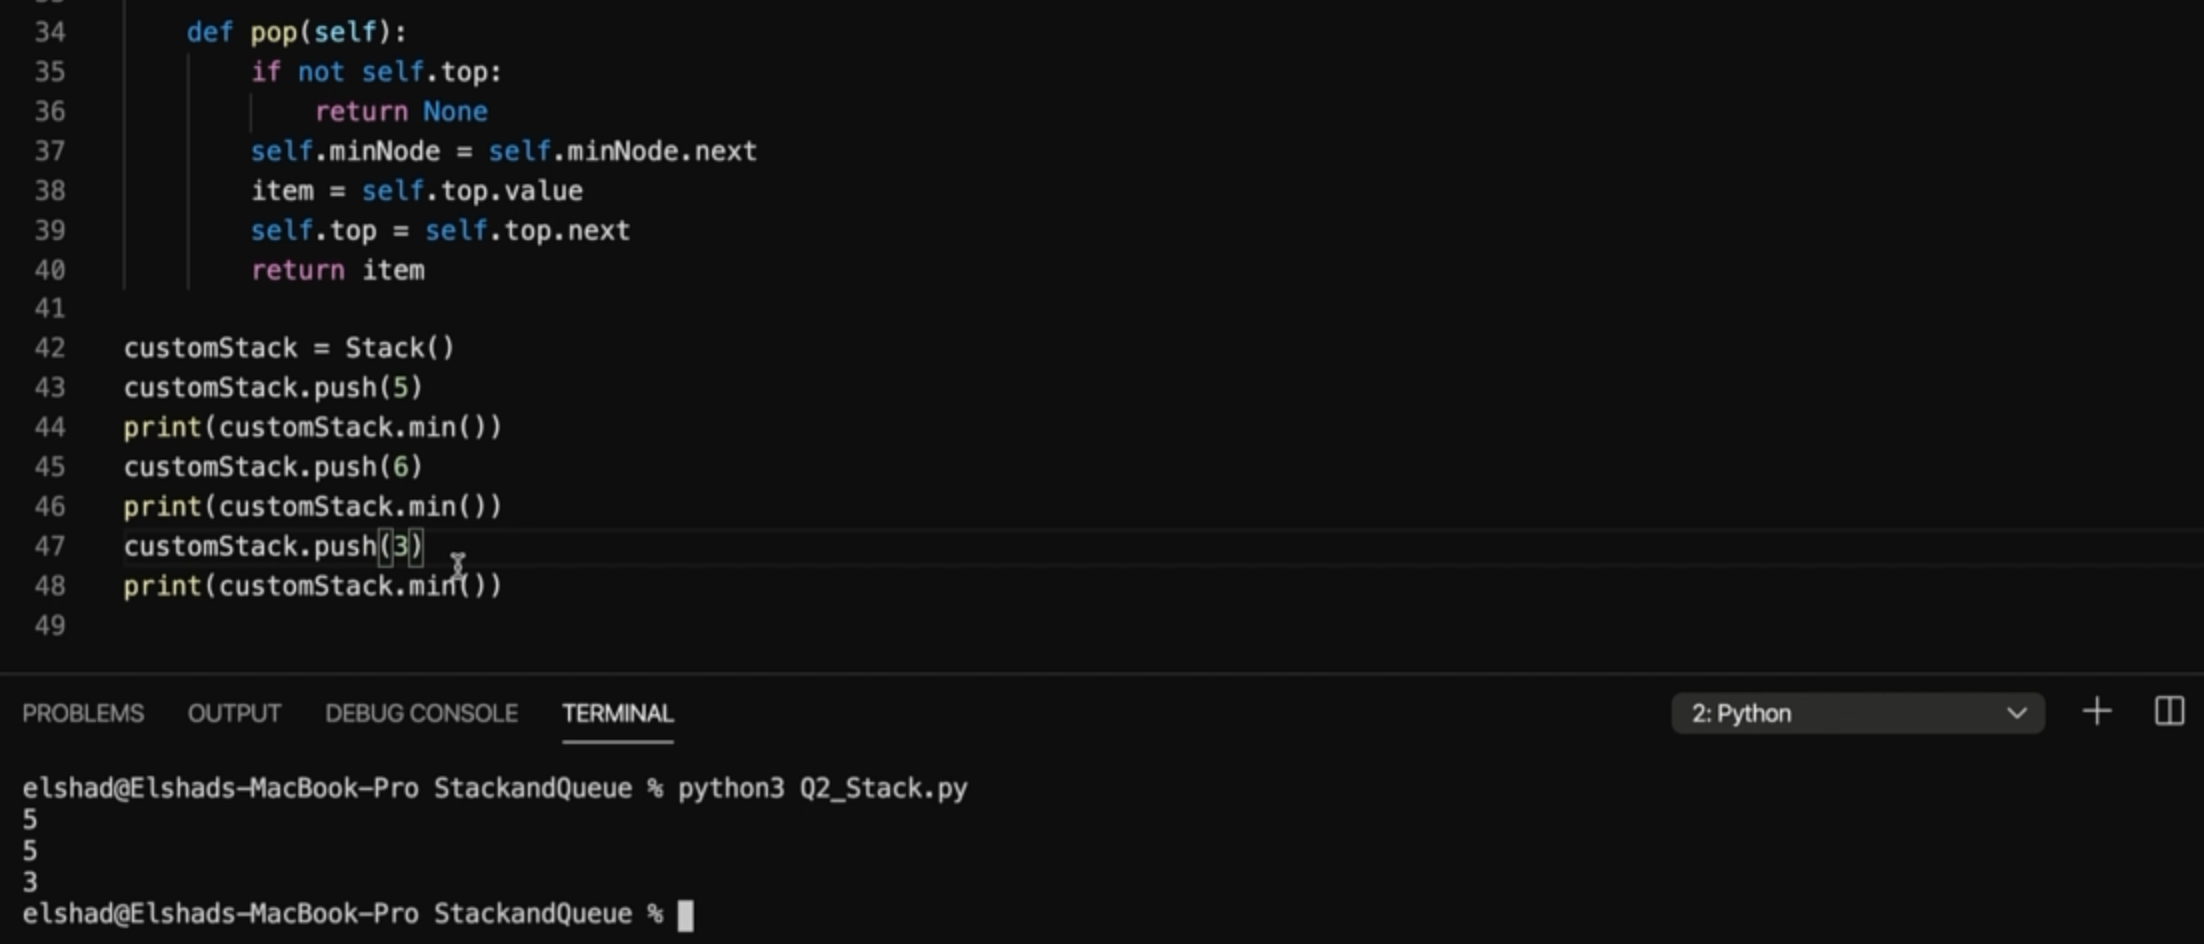

In [ ]:
class Node():
    def __init__(self, value=None, next = None):
        self.value = value
        self.next = next
    
    def __str__(self):
        string = str(self.value)
        if self.next:
            string += ',' + str(self.next)
        return string

class Stack():
    def __init__(self):
        self.top = None
        self.minNode = None
    
    def min(self):
        if not self.minNode:
            return None
        return self.minNode.value
    
    def push(self, item):
        if self.minNode and (self.minNode.value < item):
            self.minNode = Node(value = self.minNode.value, next=self.minNode)
        else:
            self.minNode = Node(value = item, next=self.minNode)
        self.top = Node(value=item, next=self.top)
    
    def pop(self):
        if not self.top:
            return None
        self.minNode = self.minNode.next
        item = self.top.value
        self.top = self.top.next
        return item

customStack = Stack()
customStack.push(5)
print(customStack.min())
customStack.push(6)
print(customStack.min())
customStack.push(3)
print(customStack.min())
customStack.pop()
print(customStack.min())


###**1172. Dinner Plate Stacks**

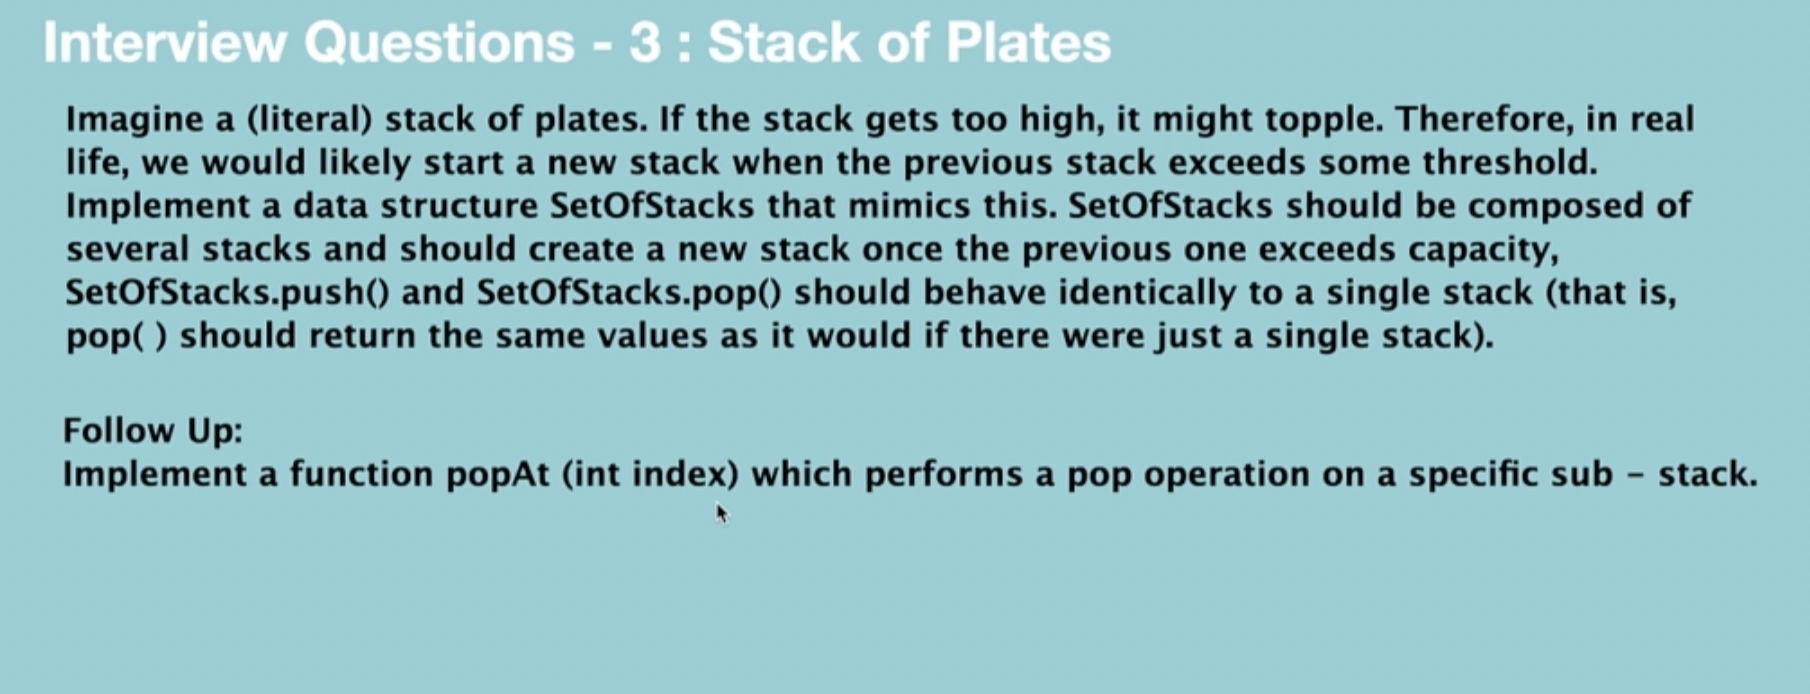

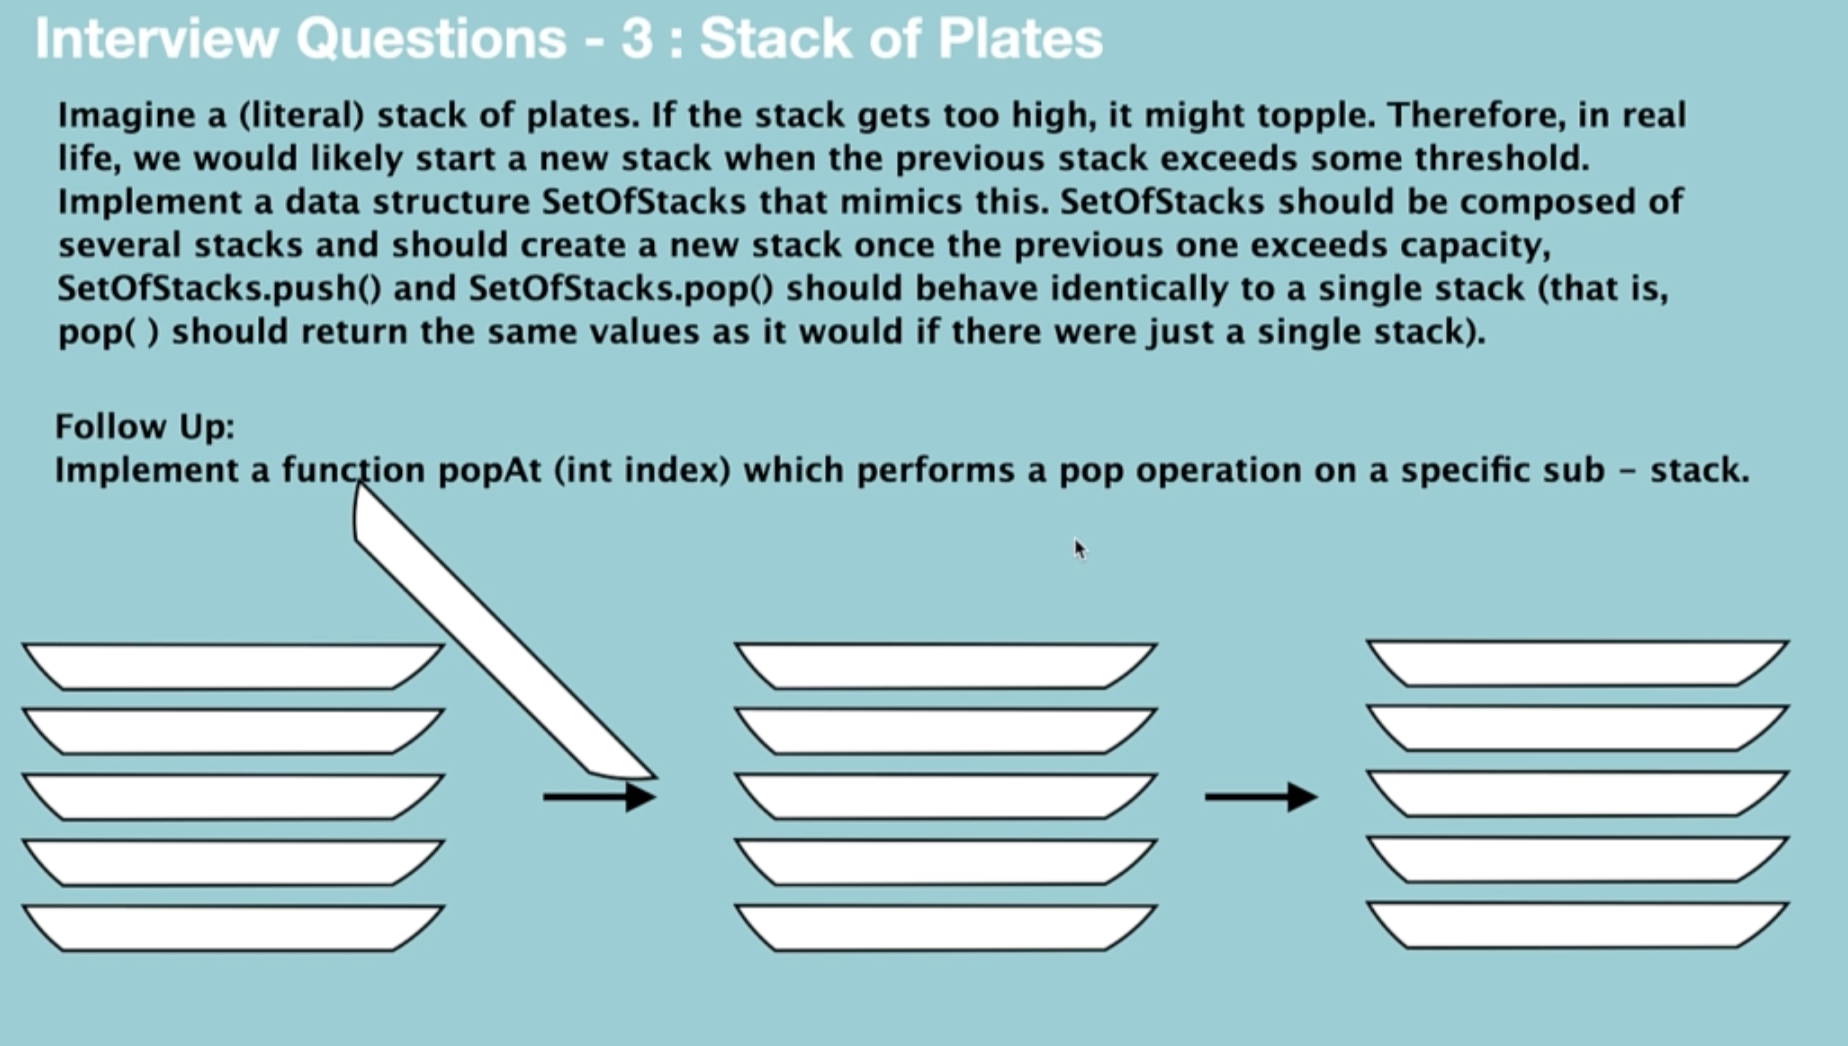

In [ ]:
class PlateStack():
    def __init__(self, capacity):
        self.capacity = capacity
        self.stacks = []
    
    def __str__(self):
        return self.stacks
    
    def push(self, item):
        if len(self.stacks) > 0 and (len(self.stacks[-1])) < self.capacity:
            self.stacks[-1].append(item)
        else:
            self.stacks.append([item])
    
    def pop(self):
        while len(self.stacks) and len(self.stacks[-1]) == 0:
            self.stacks.pop()
        if len(self.stacks) == 0:
            return None
        else:
            return self.stacks[-1].pop()
    
    def pop_at(self, stackNumber):
        if len(self.stacks[stackNumber]) > 0:
            return self.stacks[stackNumber].pop()
        else:
            return None


customStack= PlateStack(2)
customStack.push(1)
customStack.push(2)
customStack.push(3)
customStack.push(4)
print(customStack.pop_at(1))


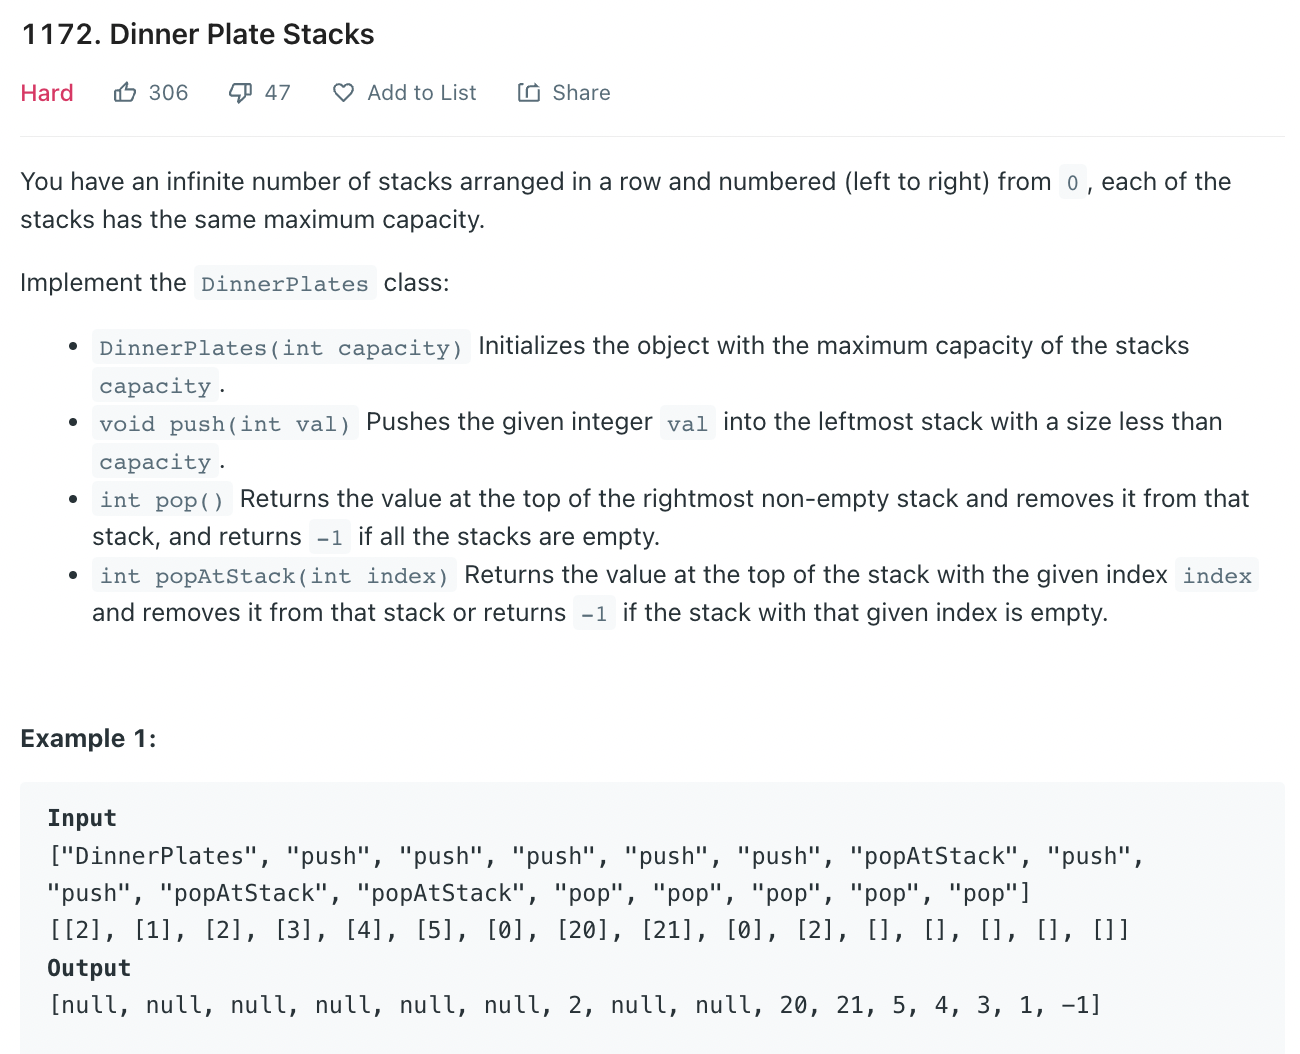

In [ ]:
import heapq

class DinnerPlates(object):
    def __init__(self, capacity):
        self.capacity = capacity
        self.stacks = []
        self.q = []


    def push(self, val):
       # 1- clean up q from full stacks
        while self.q and self.q[0]<len(self.stacks) and len(self.stacks[self.q[0]]) == self.capacity:
            heapq.heappop(self.q) # O(1)

        if not self.q:
            heapq.heappush(self.q, len(self.stacks))

        if self.q[0] == len(self.stacks):
            self.stacks.append([])

        self.stacks[self.q[0]].append(val)

    def pop(self):

        # cleanup empty stacks from right
        while self.stacks and not self.stacks[-1]:
            self.stacks.pop()

        return self.popAtStack(len(self.stacks)-1)

    def popAtStack(self, index):
        if 0<= index< len(self.stacks) and self.stacks[index]:
            heapq.heappush(self.q, index)
            return self.stacks[index].pop()
        return -1
            
    

# Your DinnerPlates object will be instantiated and called as such:
# obj = DinnerPlates(capacity)
# obj.push(val)
# param_2 = obj.pop()
# param_3 = obj.popAtStack(index)